In [147]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [149]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EV EDA/dataset.csv")

In [150]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [151]:
df.shape

(112634, 17)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [153]:
# Droping the unwanted columns

In [154]:
df.drop(columns = ['VIN (1-10)','2020 Census Tract','DOL Vehicle ID','Legislative District' ], inplace = True)

In [155]:
df.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Vehicle Location,Electric Utility
0,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,POINT (-81.80023 24.5545),NaN
1,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,POINT (-114.57245 35.16815),NaN
2,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,POINT (-120.50721 46.60448),PACIFICORP
3,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC
4,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC


In [156]:
df.columns

Index(['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Vehicle Location', 'Electric Utility'],
      dtype='object')

In [157]:
df.columns = df.columns.str.lower()

In [158]:
df.describe()

,postal code,model year,electric range,base msrp
count,112634.000000,112634.000000,112634.000000,112634.000000
mean,98156.226850,2019.003365,87.812987,1793.439681
std,2648.733064,2.892364,102.334216,10783.753486
min,1730.000000,1997.000000,0.000000,0.000000
25%,98052.000000,2017.000000,0.000000,0.000000
50%,98119.000000,2020.000000,32.000000,0.000000
75%,98370.000000,2022.000000,208.000000,0.000000
max,99701.000000,2023.000000,337.000000,845000.000000


## Univariate Analysis

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 13 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   county                                             112634 non-null  object
 1   city                                               112634 non-null  object
 2   state                                              112634 non-null  object
 3   postal code                                        112634 non-null  int64 
 4   model year                                         112634 non-null  int64 
 5   make                                               112634 non-null  object
 6   model                                              112614 non-null  object
 7   electric vehicle type                              112634 non-null  object
 8   clean alternative fuel vehicle (cafv) eligibility  112634 non-null  object
 9   elec

In [160]:
df['county'].value_counts(normalize =True)

,proportion
county,
King,0.523821
Snohomish,0.110393
Pierce,0.075776
Clark,0.059387
Thurston,0.036632
...,...
Pinal,0.000009
Elmore,0.000009
Portsmouth,0.000009


### It can be stated that 63% of the county's vehicles comes from King and Snohomish.

In [161]:
city_veh = df['city'].value_counts().head(10)
city_veh

,count
city,
Seattle,20305
Bellevue,5921
Redmond,4201
Vancouver,4013
Kirkland,3598
Bothell,3335
Sammamish,3292
Renton,2778
Olympia,2745


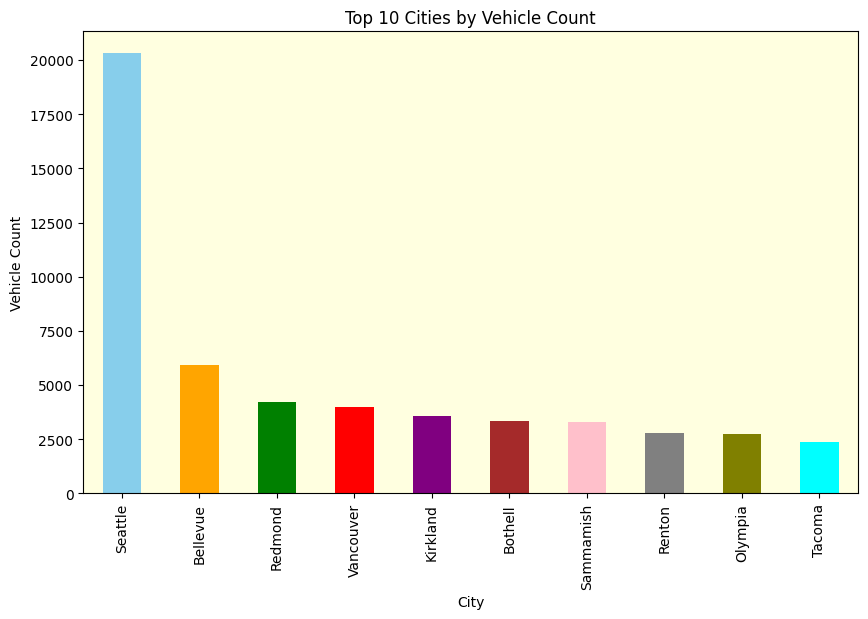

In [162]:
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

ax = city_veh.plot(kind='bar', color=colors, figsize=(10, 6))
ax.set_facecolor('lightyellow')

plt.title('Top 10 Cities by Vehicle Count')
plt.xlabel('City')
plt.ylabel('Vehicle Count')
plt.show()

### These are the top 10 cities that have electric vehicles.

In [163]:
state = df['state'].value_counts(normalize = True).head(10)
state

,proportion
state,
WA,0.997461
CA,0.000675
VA,0.000320
MD,0.000231
TX,0.000124
CO,0.000080
NV,0.000071
GA,0.000062
NC,0.000062


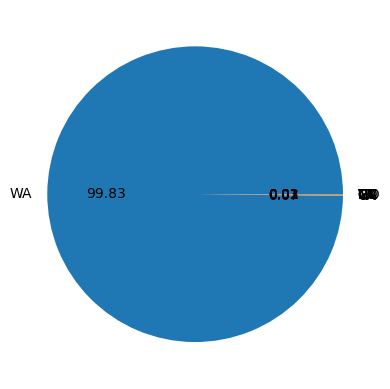

In [164]:
plt.pie(x=state.values, labels=state.index, autopct='%.2f')
plt.show()

### From this pie chart, it is evident that 99% of the vehicles originate from Washington State.


In [165]:
df.columns

Index(['county', 'city', 'state', 'postal code', 'model year', 'make', 'model',
       'electric vehicle type',
       'clean alternative fuel vehicle (cafv) eligibility', 'electric range',
       'base msrp', 'vehicle location', 'electric utility'],
      dtype='object')

In [166]:
model_year = df['model year'].value_counts()
model_year

,count
model year,
2022,26530
2021,18364
2018,14246
2020,11038
2019,10266
2017,8644
2016,5735
2015,4940
2013,4691


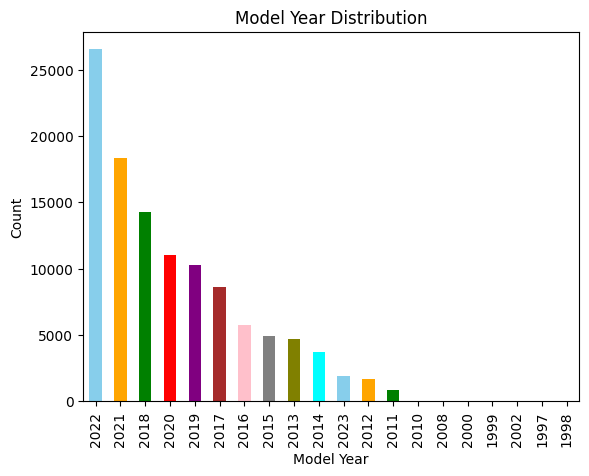

In [167]:
model_year.plot(kind = 'bar', color = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])

plt.title('Model Year Distribution')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.show()

### From this bar plot, we can conclude that the increase in electric vehicles began in 2011, and the period from 2011 to 2022 shows the most significant growth.

In [168]:
df['make'].value_counts(normalize= True).head(5)

,proportion
make,
TESLA,0.462365
NISSAN,0.114353
CHEVROLET,0.090399
FORD,0.051663
BMW,0.041551


In [169]:
company = df['make'].value_counts().head(5)
company

,count
make,
TESLA,52078
NISSAN,12880
CHEVROLET,10182
FORD,5819
BMW,4680


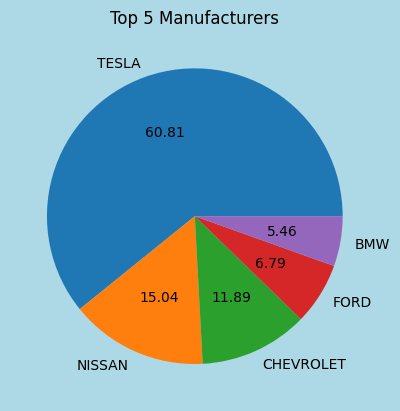

In [170]:
fig, ax = plt.subplots()
ax.pie(x=company.values, labels=company.index, autopct='%.2f')
ax.set_title('Top 5 Manufacturers')
fig.patch.set_facecolor('lightblue')
plt.show()

### Out of 35 manufacturers companies, these are the top five manufacturers that have sold the highest number of electric vehicles, with Tesla accounting for 46% of the total sales.

In [171]:
models = df['model'].value_counts().head(10)
models

,count
model,
MODEL 3,23135
MODEL Y,17142
LEAF,12880
MODEL S,7377
BOLT EV,4910
VOLT,4896
MODEL X,4370
PRIUS PRIME,2380
NIRO,2260


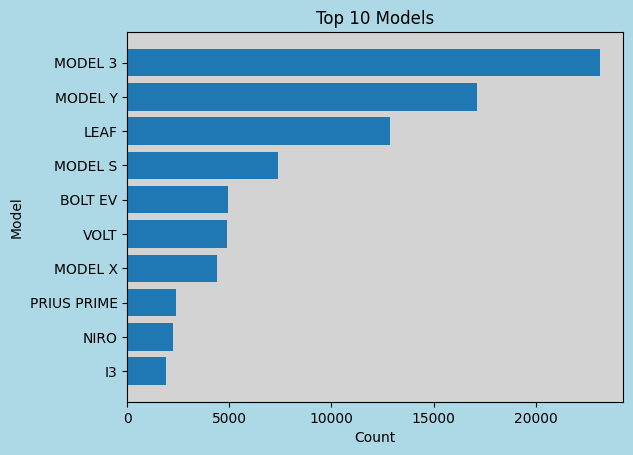

In [172]:
fig, ax = plt.subplots()
models_sorted = models.sort_values(ascending=True)

ax.barh(y=models_sorted.index, width=models_sorted.values)
ax.set_xlabel('Count')
ax.set_ylabel('Model')
ax.set_title('Top 10 Models')
fig.patch.set_facecolor('lightblue')

ax.set_facecolor('lightgray')
plt.show()

### Among the top 10 electric vehicle models, the most popular are the Model 3 and Model Y.

In [173]:
electric_type = df['electric vehicle type'].value_counts()
electric_type

,count
electric vehicle type,
Battery Electric Vehicle (BEV),86044
Plug-in Hybrid Electric Vehicle (PHEV),26590


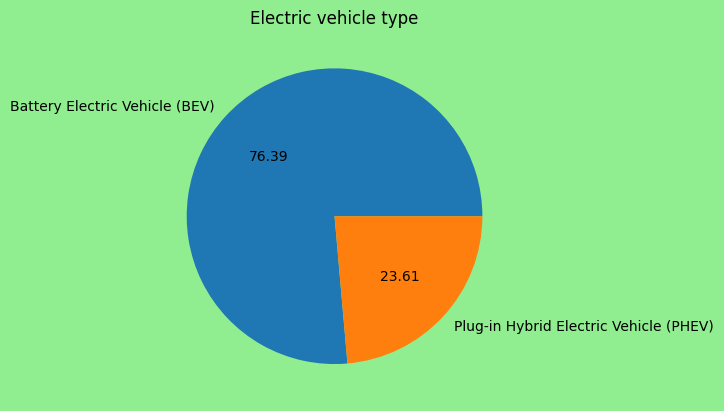

In [174]:
fig, ax = plt.subplots()
ax.pie(x=electric_type.values, labels=electric_type.index, autopct='%.2f')
ax.set_title('Electric vehicle type')
fig.patch.set_facecolor('lightgreen')
plt.show()

### The most preferred electric vehicle type is the Battery Electric Vehicle (BEV), accounting for 76%.

In [175]:
CAFV = df['clean alternative fuel vehicle (cafv) eligibility'].value_counts(normalize= True)
CAFV

,proportion
clean alternative fuel vehicle (cafv) eligibility,
Clean Alternative Fuel Vehicle Eligible,0.520615
Eligibility unknown as battery range has not been researched,0.348350
Not eligible due to low battery range,0.131035


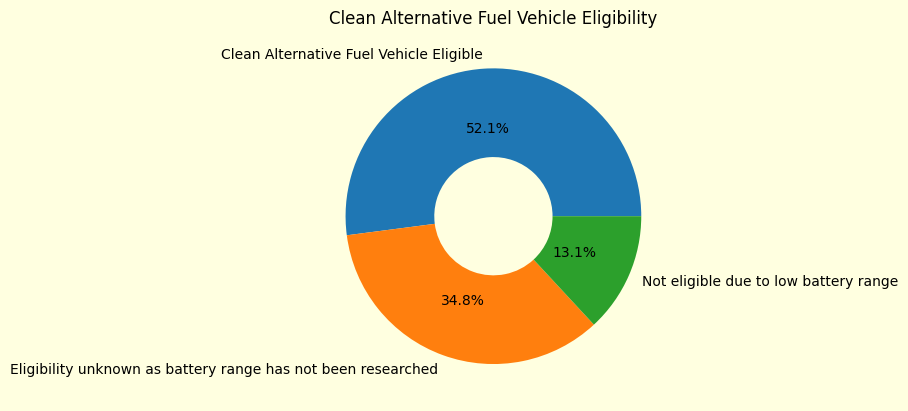

In [176]:
fig, ax = plt.subplots()
ax.pie(x=CAFV.values, labels=CAFV.index, autopct='%1.1f%%',
       wedgeprops={'width': 0.6})
ax.set_title('Clean Alternative Fuel Vehicle Eligibility')
fig.patch.set_facecolor('lightyellow')
plt.show()

### The donut chart indicates that 52.1% of vehicles are eligible for Clean Alternative Fuel Vehicle (CAFV) status, while 34.8% are ineligible due to low battery range. Additionally, 13.1% of vehicles have unknown eligibility because their battery range has not been researched. This highlights the significant proportion of eligible vehicles and the importance of understanding battery capabilities.

In [177]:
df.columns

Index(['county', 'city', 'state', 'postal code', 'model year', 'make', 'model',
       'electric vehicle type',
       'clean alternative fuel vehicle (cafv) eligibility', 'electric range',
       'base msrp', 'vehicle location', 'electric utility'],
      dtype='object')

In [178]:
df['electric range'].value_counts()

,count
electric range,
0,39236
215,6306
84,4118
220,4032
238,3473
...,...
11,3
95,2
57,1


In [179]:
df['electric range'].describe()

,electric range
count,112634.000000
mean,87.812987
std,102.334216
min,0.000000
25%,0.000000
50%,32.000000
75%,208.000000
max,337.000000


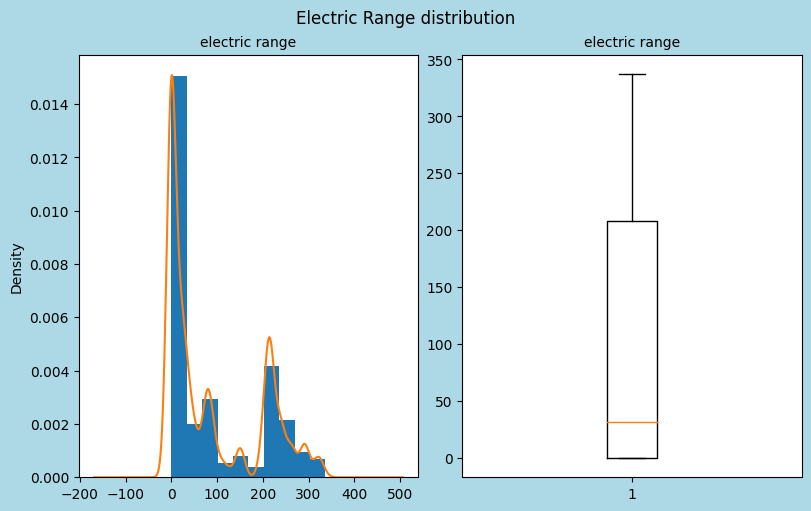

In [180]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
fig.suptitle("Electric Range distribution")

axs[0].hist(df['electric range'], density=True)
df['electric range'].plot(kind = 'kde', ax = axs[0])
axs[0].set_title("electric range", fontsize="medium")

axs[1].boxplot(df['electric range'])
axs[1].set_title("electric range", fontsize="medium")
fig.patch.set_facecolor('lightblue')
plt.show()

### Battery Electric Vehicle (BEV) have Elecrtric Range range between 0 -337, median Electric Range is 76.

In [181]:
df['base msrp'].value_counts(normalize = True).head()

,proportion
base msrp,
0,0.968819
69900,0.013291
31950,0.003613
52900,0.001900
32250,0.001421


In [182]:
df['base msrp'].describe()

,base msrp
count,112634.000000
mean,1793.439681
std,10783.753486
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,845000.000000


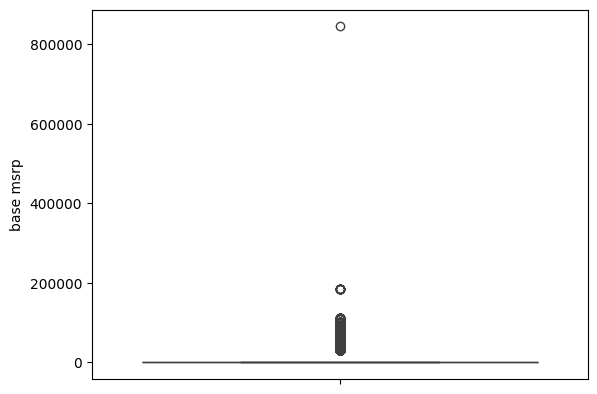

In [183]:
sns.boxplot(df['base msrp'])
plt.show()


In [184]:
dt = df[df['base msrp'] < 150000]
dt.head()

,county,city,state,postal code,model year,make,model,electric vehicle type,clean alternative fuel vehicle (cafv) eligibility,electric range,base msrp,vehicle location,electric utility
0,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,POINT (-81.80023 24.5545),NaN
1,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,POINT (-114.57245 35.16815),NaN
2,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,POINT (-120.50721 46.60448),PACIFICORP
3,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC
4,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC


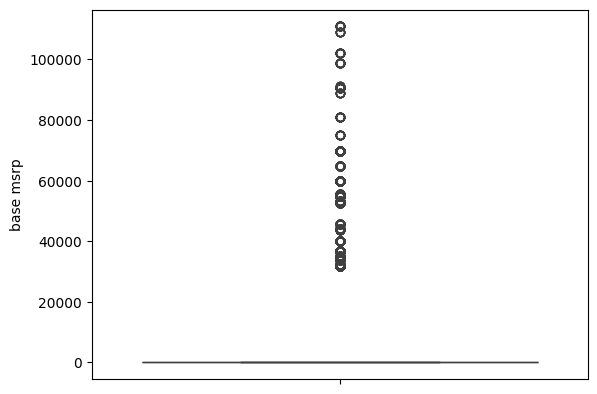

In [185]:
sns.boxplot(dt['base msrp'])
plt.show()

### Given that 96% of the data shows a base MSRP of 0, we require additional data from the company

In [186]:
df.columns

Index(['county', 'city', 'state', 'postal code', 'model year', 'make', 'model',
       'electric vehicle type',
       'clean alternative fuel vehicle (cafv) eligibility', 'electric range',
       'base msrp', 'vehicle location', 'electric utility'],
      dtype='object')

In [187]:
df['electric utility'].value_counts(normalize = True).head(10)

,proportion
electric utility,
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),0.358736
PUGET SOUND ENERGY INC,0.197627
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),0.191165
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA),0.058133
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY,0.045039
PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY,0.023808
BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY,0.014966
BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY,0.009003
PACIFICORP,0.007550


### According to this, we can state that Puget Sound Energy Inc. and the City of Tacoma (WA) are providing the highest service among electric utilities, with a share of 35%

# Bivariate Analysis

In [188]:
df.columns

Index(['county', 'city', 'state', 'postal code', 'model year', 'make', 'model',
       'electric vehicle type',
       'clean alternative fuel vehicle (cafv) eligibility', 'electric range',
       'base msrp', 'vehicle location', 'electric utility'],
      dtype='object')

In [189]:
t = pd.crosstab(df['city'], df['make'])

top10_models = t.sum().sort_values(ascending=False)[:5].index

In [190]:
top10_models

Index(['TESLA', 'NISSAN', 'CHEVROLET', 'FORD', 'BMW'], dtype='object', name='make')

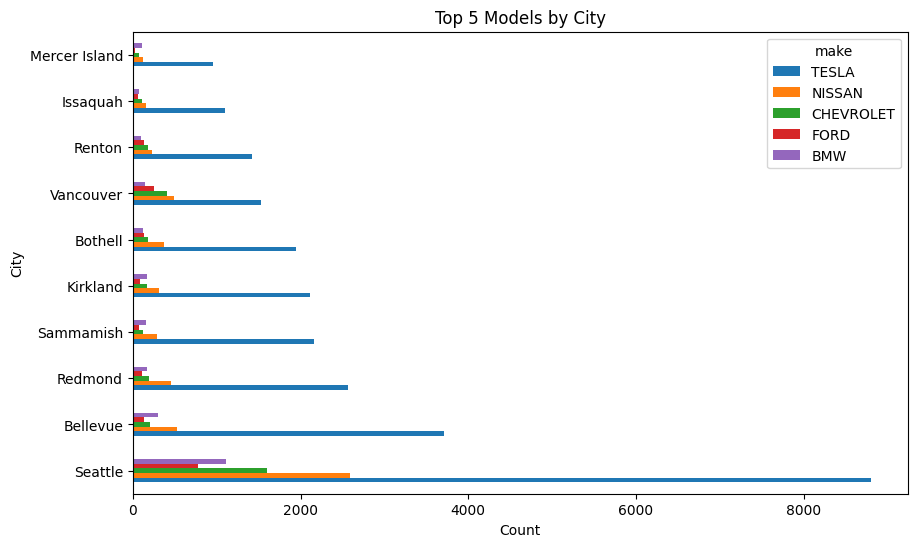

In [191]:
t_filtered = t[top10_models].sort_values(by=['TESLA', 'NISSAN', 'CHEVROLET', 'FORD', 'BMW'], ascending=[ False,False,False, False, False])[:10]

t_filtered.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Top 5 Models by City')
plt.show()

###  The bar chart shows the top 5 electric vehicle models by make (Tesla, Nissan, Chevrolet, Ford, BMW) across various cities. Tesla dominates the count in almost every city, particularly in Seattle and Bellevue, where it has the highest number of vehicles. Other brands like Nissan, Chevrolet, Ford, and BMW have smaller shares in these cities, with much lower counts. Seattle and Bellevue stand out as cities with a significantly higher number of electric vehicles compared to the others. This chart highlights Tesla's strong presence in the electric vehicle market across these urban areas.

In [192]:
'model year', 'make',

('model year', 'make')

In [193]:
make_year = df.groupby(['model year', 'make'])['make'].count().sort_values(ascending = False).head(10)
make_year

,,make
model year,make,
2022,TESLA,14548
2021,TESLA,11028
2018,TESLA,7919
2020,TESLA,7018
2019,TESLA,4583
2017,CHEVROLET,2744
2022,KIA,2153
2013,NISSAN,1966
2015,NISSAN,1839


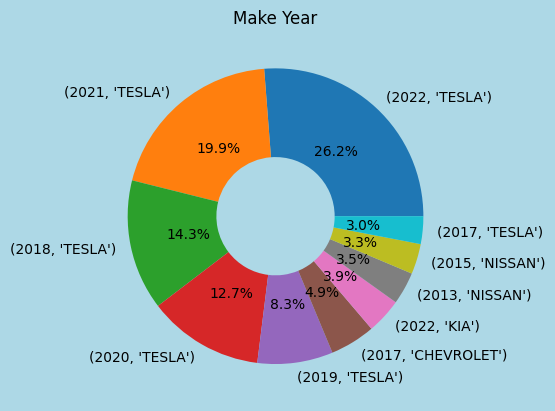

In [194]:
fig, ax = plt.subplots()
ax.pie(x=make_year.values, labels=make_year.index ,autopct='%1.1f%%',
       wedgeprops={'width': 0.6})
ax.set_title('Make Year')
fig.patch.set_facecolor('lightblue')
plt.show()

### As observed in this pie chart, Tesla has been the leading manufacturer of electric vehicles from 2018 to 2022

In [195]:
df.columns

Index(['county', 'city', 'state', 'postal code', 'model year', 'make', 'model',
       'electric vehicle type',
       'clean alternative fuel vehicle (cafv) eligibility', 'electric range',
       'base msrp', 'vehicle location', 'electric utility'],
      dtype='object')

In [196]:
pivot_table = df.groupby(['make', 'electric vehicle type']).size().unstack(fill_value=0)

In [197]:
pivot_table

electric vehicle type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
make,,
AUDI,1126,1206
AZURE DYNAMICS,7,0
BENTLEY,0,3
BMW,905,3775
CADILLAC,0,108
CHEVROLET,5286,4896
CHRYSLER,0,1794
FIAT,822,0
FISKER,0,20


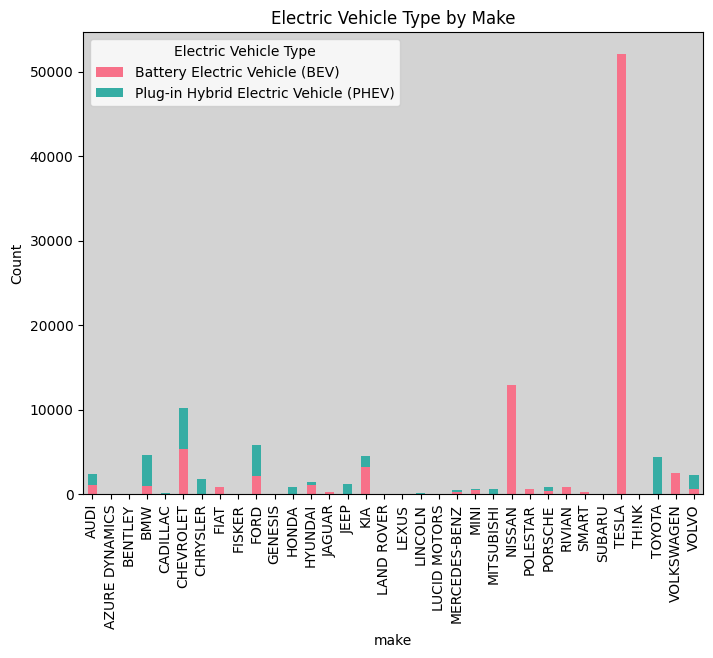

In [198]:
colors = sns.color_palette("husl", len(pivot_table.columns))

pivot_table.plot(kind='bar', stacked=True, figsize=(8, 6), color=colors)
plt.gca().set_facecolor('lightgray')
plt.ylabel('Count')
plt.title('Electric Vehicle Type by Make')
plt.legend(title='Electric Vehicle Type')
plt.show()

## In this stacked bar plot, it is evident that Tesla is the leading manufacturer of electric vehicles. Additionally, Tesla has never produced plug-in hybrid electric vehicles (PHEVs), while many other companies manufacture both battery electric vehicles (BEVs) and PHEVs.

### Cross-tabulation of clean alternative fuel vehicle (cafv) eligibility by electric vehicle type

In [199]:
cross = pd.crosstab(df['electric vehicle type'], df['clean alternative fuel vehicle (cafv) eligibility'])
cross

clean alternative fuel vehicle (cafv) eligibility,Clean Alternative Fuel Vehicle Eligible,Eligibility unknown as battery range has not been researched,Not eligible due to low battery range
electric vehicle type,,,
Battery Electric Vehicle (BEV),46799,39236,9
Plug-in Hybrid Electric Vehicle (PHEV),11840,0,14750


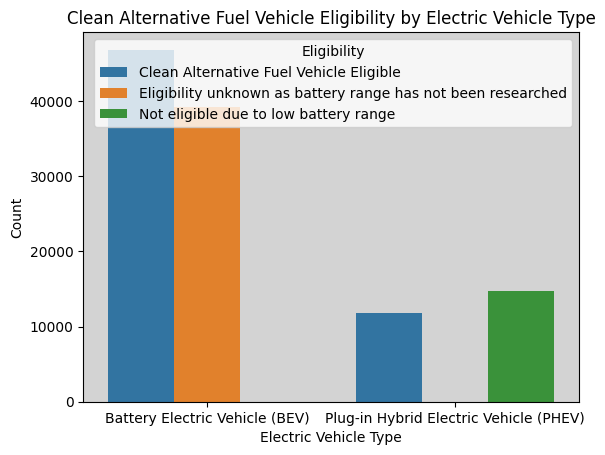

In [200]:
cross_melted = pd.melt(cross.reset_index(), id_vars=['electric vehicle type'], value_vars=cross.columns, var_name='Eligibility', value_name='Count')

sns.barplot(x='electric vehicle type', y='Count', hue='Eligibility', data=cross_melted)
plt.gca().set_facecolor('lightgray')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.title('Clean Alternative Fuel Vehicle Eligibility by Electric Vehicle Type')
plt.show()

## The Bar-plot data shows the Clean Alternative Fuel Vehicle (CAFV) eligibility for two types of electric vehicles:

    Battery Electric Vehicles (BEVs): 46,799 are eligible, 39,236 have unknown eligibility (battery range not researched),
    and 9 are not eligible due to low battery range.

    Plug-in Hybrid Electric Vehicles (PHEVs): 11,840 are eligible,
    and 14,750 are not eligible due to insufficient battery range.

## Overall, BEVs are more likely to qualify as CAFV eligible, while a significant number of PHEVs are not eligible due to low battery range.

In [201]:
df.columns

Index(['county', 'city', 'state', 'postal code', 'model year', 'make', 'model',
       'electric vehicle type',
       'clean alternative fuel vehicle (cafv) eligibility', 'electric range',
       'base msrp', 'vehicle location', 'electric utility'],
      dtype='object')

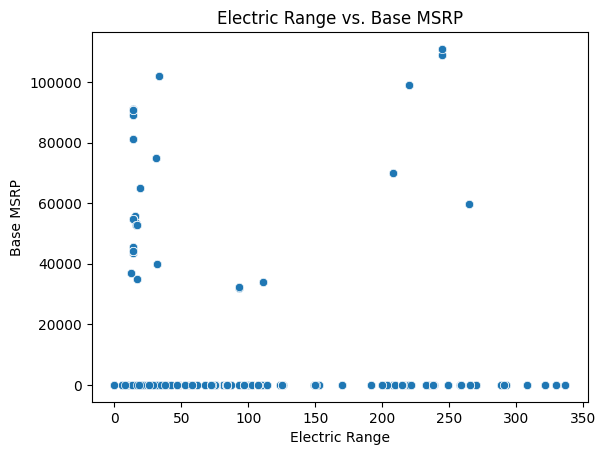

In [202]:
sns.scatterplot(data=dt, x='electric range', y='base msrp')

plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.title('Electric Range vs. Base MSRP')
plt.show()

## There's no strong direct correlation visible between electric range and base MSRP. While higher-end vehicles may have a longer electric range, the wide range of MSRPs at low electric ranges suggests that other factors besides range are influencing the price.

In [203]:
df_cor = df.select_dtypes(include=['int64', 'float64'])

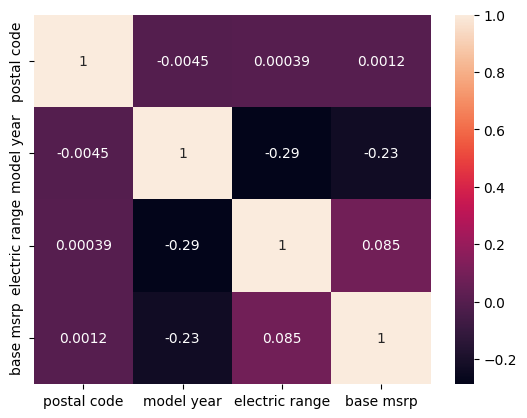

In [204]:
sns.heatmap(df_cor.corr(), annot = True)
plt.show()

## The heatmap displays correlations between variables like postal code, model year, electric range, and base MSRP:

Model year has a moderate negative correlation with electric range (-0.29) and base MSRP (-0.23), suggesting newer models might have slightly lower range and price, though not strongly.
Electric range and base MSRP have a very weak positive correlation (0.085), indicating almost no relationship between them.
Postal code shows no meaningful correlation with any other variable.
Overall, the correlations are weak, indicating little interdependence between these variables.

# Choropleth animation

In [205]:
import plotly.express as px

In [206]:
states = df['state'].value_counts().reset_index()

In [207]:
fig = px.choropleth(states,
                    locations='state',
                    locationmode="USA-states",
                    color='count',
                    color_continuous_scale="Viridis",
                    scope="usa")

fig.update_layout(geo=dict(bgcolor= 'rgba(0,0,0,0)'), paper_bgcolor='lightyellow')
fig.show()

# Racing Bar Plot

In [208]:
car_counts = df.groupby(['model year', 'make'])['make'].count().reset_index(name='count')

fig = px.bar(car_counts,x="count",y="make",color="count",animation_frame="model year",orientation="h",
    labels={"count": "Number of Sales", "model year": "Year"},
    range_x=[0, car_counts['count'].max() * 1.1],
    height=650,
    title="Yearly Sales of Each EV Maker",
    color_continuous_scale='viridis'
)

fig.update_layout(title_font_size=20, xaxis_title_font_size=10,yaxis_title_font_size=18, font_size=14)
fig.update_yaxes(categoryorder="total ascending")

fig.show()